# Detecting Topic Merges and Splits in Dynamic Political Conversations

### Exploratory Data Analysis

Cláudia Oliveira 

Supervisor - Prof. Dr. Álvaro Figueira

Faculty of Science, University of Porto

In this section, we will be performing an exploratory data analysis

Importing the needed packages:

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch
import re
from collections import Counter
import networkx as nx
import matplotlib as mpl

Importing the needed datasets:

In [38]:
members = pd.read_excel("datasets/Twitters_19thCongressMembers.xlsx")
tweets = pd.read_csv("datasets/tweets.csv", encoding="utf-8", low_memory=False)

Inicial look at the tweets dataset:

In [67]:
tweets.head(5)

,Name,Role,State,District,Party,Served,Account,tweet_id,text,language,...,media_type,media_urls,week,engagement,has_media,weekday,hour,mentions_in_text,mentions,date
0,"Ocasio-Cortez, Alexandria",Representative,New York,14,Democratic,House: 2019-Present,AOC,'1969522226455019889',Why are you tweeting your private likes?,en,...,NaN,NaN,2025-09-24,333929,False,Saturday,23,False,[],2025-09-20
1,"Ocasio-Cortez, Alexandria",Representative,New York,14,Democratic,House: 2019-Present,AOC,'1969507666415280631',Let’s go @RepYvetteClarke! \n\n💙 UNITY. 💙,en,...,NaN,NaN,2025-09-24,5317,False,Saturday,22,True,[RepYvetteClarke],2025-09-20
2,"Ocasio-Cortez, Alexandria",Representative,New York,14,Democratic,House: 2019-Present,AOC,'1969505961732612540',Who’s the illegal now @RealTomHoman,en,...,NaN,NaN,2025-09-24,81787,False,Saturday,21,True,[RealTomHoman],2025-09-20
3,"Ocasio-Cortez, Alexandria",Representative,New York,14,Democratic,House: 2019-Present,AOC,'1969074559602110509',"We should be clear about who Charlie Kirk was: a man who believed that the Civil Rights Act that granted Black Americans the right to vote was a “mistake,” who after the violent attack on Paul Pelosi claimed that “some amazing patriot out there” should bail out his assailant, and accused Jews of controlling “not just the colleges – it’s the nonprofits, it’s the movies, it’s Hollywood, it’s all of it.”\n\nHis rhetoric and beliefs were ignorant and sought to disenfranchise millions of Americans – far from “working tirelessly to promote unity” as asserted by the majority in this resolution.”\n\nWe can condemn his horrific assassination and the scourge of political violence without uplifting these ideas.",en,...,NaN,NaN,2025-09-24,187707,False,Friday,17,False,[],2025-09-19
4,"Ocasio-Cortez, Alexandria",Representative,New York,14,Democratic,House: 2019-Present,AOC,'1965876680553279580',The scourge of gun violence and political violence must end.\n\nThe shooting of Charlie Kirk is the latest incident of this chaos and it must stop. We cannot go down this road.\n\nThere is no place for it in America and we wish for his recovery.,en,...,NaN,NaN,2025-09-10,111956,False,Wednesday,21,False,[],2025-09-10


In [39]:
num_rows, num_col = tweets.shape
print(f"Number of rows: {num_rows}")
print(f"Number of collumns: {num_col}")
print(f"Collumns: {tweets.columns}")
print("Number of missing values per collumn:")
print(tweets.isna().sum())

Number of rows: 357896
Number of collumns: 22
Collumns: Index(['Name', 'Role', 'State', 'District', 'Party', 'Served', 'Account',
       'tweet_id', 'text', 'language', 'type', 'bookmark_count',
       'favorite_count', 'retweet_count', 'reply_count', 'view_count',
       'created_at', 'client', 'hashtags', 'urls', 'media_type', 'media_urls'],
      dtype='object')
Number of missing values per collumn:
Name                   0
Role                   0
State                  0
District           84996
Party                  0
Served                 0
Account                0
tweet_id               0
text                   1
language               0
type                   0
bookmark_count         0
favorite_count         0
retweet_count          0
reply_count            0
view_count            10
created_at             0
client                 0
hashtags          334463
urls              302669
media_type        190184
media_urls        190184
dtype: int64


### These are the questions that will be answered:

1) How many are democrats, republicans and independents?

2) How many are active on X?

3) How many tweets per week?

4) How many tweets per party?

5) Which are the top 10 most active accounts?

6) Which are the languages the tweets are writen in?

7) How many are tweets and how many are replies?

8) Which are the most popular hashtags used?

9) What are the tweets the most engage? 

10) What is the average engagement per party?

11) Do tweets with media have more engagement?

12) Tweets per hour per day

13) What are the most mentioned accounts?

14) Who replies to whom most often? 

15) How many Senators and Representatives are there?

16) Are Senators more active than Representatives?

17) Do Senators get more engagement than Representatives?

18) How many senators are democratic and republican? And for representatives?

19) How is the cumulative growth of tweets over time

20) How is the cumulative growth of tweets over time per party per role

#### 1) How many are democrats, republicans and independents?

Party
Republican     277
Democratic     266
Independent      2
Name: count, dtype: int64


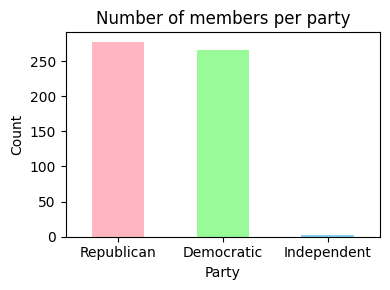

In [40]:
party_counts = members["Party"].value_counts()

print(party_counts)

colors = ["#ffb6c1", "#98fb98", "#87ceeb"] 

plt.figure(figsize=(4,3))  
party_counts.plot(kind="bar", color=colors[:len(party_counts)])
plt.title("Number of members per party")
plt.xlabel("Party")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Only two independents but there is balance between democrats and republicans

#### 2) How many are active on X?

In [41]:
active = members["Active On X"].value_counts()

print(active)

Active On X
Yes    544
No       1
Name: count, dtype: int64


Only one person doesn't have a professional X account

#### 3) How many tweets per week?

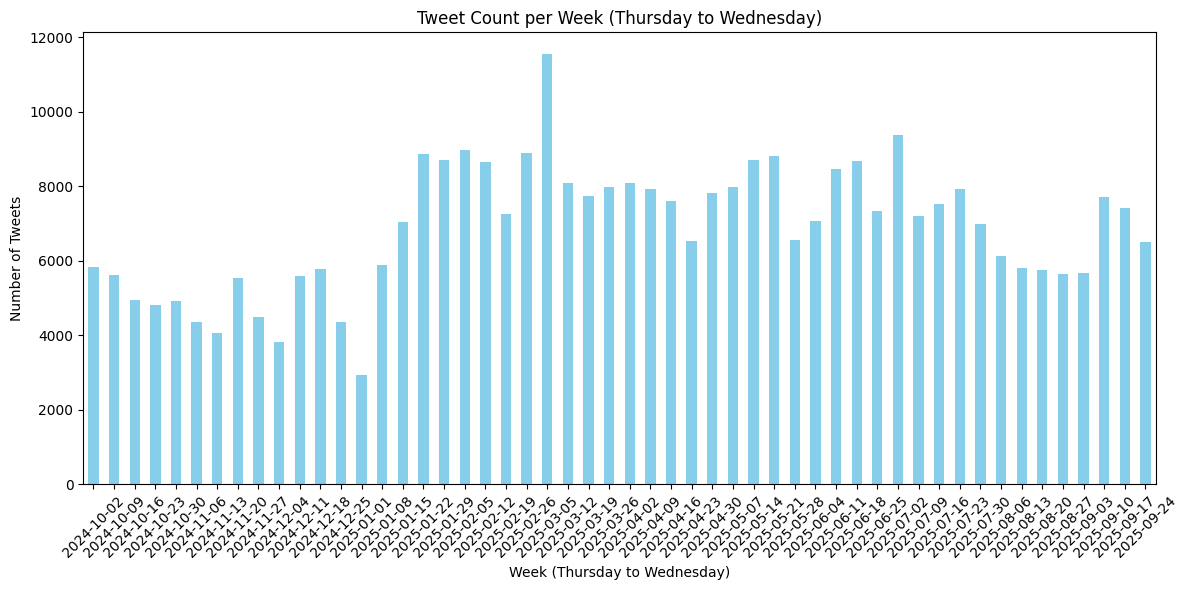

In [42]:
tweets['created_at'] = pd.to_datetime(tweets['created_at'])
tweets['week'] = tweets['created_at'].dt.to_period('W-WED').apply(lambda r: r.end_time.date())
tweetsperweek = tweets.groupby('week').size()

plt.figure(figsize=(12,6))
tweetsperweek.plot(kind='bar', color='skyblue')
plt.xlabel('Week (Thursday to Wednesday)')
plt.ylabel('Number of Tweets')
plt.title('Tweet Count per Week (Thursday to Wednesday)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The week that included christmas was where the tweets amount was lower 

#### 4) How many tweets per party?

Party
Republican     658.422383
Democratic     656.887218
Independent    390.500000
Name: count, dtype: float64


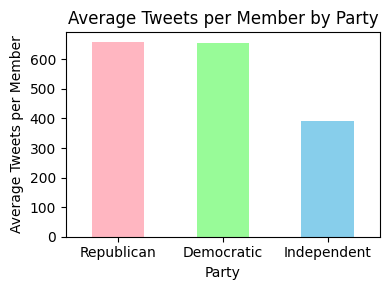

In [43]:
party_tweet_counts = tweets["Party"].value_counts()

party_member_counts = members["Party"].value_counts()

avg_tweets_per_member = party_tweet_counts / party_member_counts
print(avg_tweets_per_member)

colors = ["#ffb6c1", "#98fb98", "#87ceeb"]  

plt.figure(figsize=(4,3))
avg_tweets_per_member.plot(kind="bar", color=colors[:len(avg_tweets_per_member)])
plt.title("Average Tweets per Member by Party")
plt.xlabel("Party")
plt.ylabel("Average Tweets per Member")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

To truly understand if there is an actual difference between the parties, the data had to be normalized. We can see that there is no significant difference between the parties. Independents might be different but since that only includes 2 people, this is not relevant 

#### 5) Which are the top 10 most active accounts?

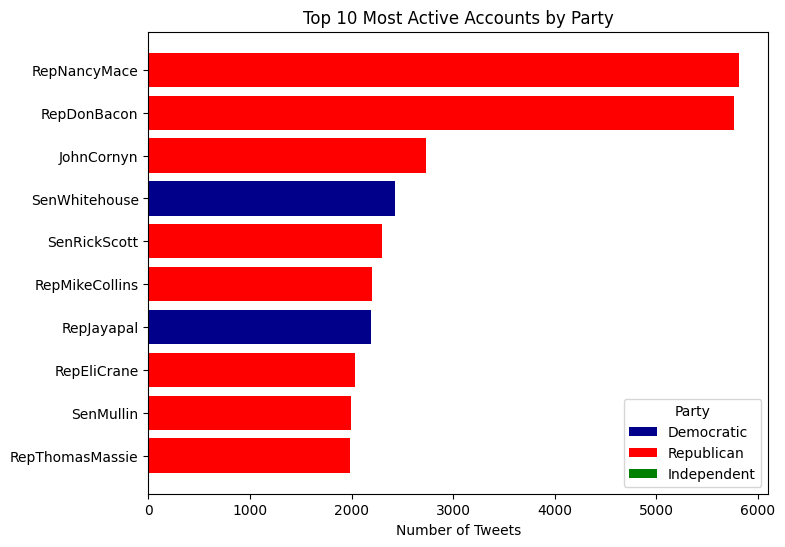

In [44]:
top_accounts = tweets['Account'].value_counts().head(10)
top_accounts_df = top_accounts.reset_index()
top_accounts_df.columns = ['Account', 'Tweet_Count']

top_accounts_df['Party'] = top_accounts_df['Account'].map(
    tweets[['Account', 'Party']].drop_duplicates().set_index('Account')['Party']
)

party_colors = {'Democratic': 'darkblue', 'Republican': 'red', 'Independent': 'green'}
colors = top_accounts_df['Party'].map(party_colors)

plt.figure(figsize=(8,6))
plt.barh(top_accounts_df['Account'], top_accounts_df['Tweet_Count'], color=colors)
plt.xlabel("Number of Tweets")
plt.title("Top 10 Most Active Accounts by Party")

legend_elements = [Patch(facecolor=color, label=party) for party, color in party_colors.items()]
plt.legend(handles=legend_elements, title='Party')

plt.gca().invert_yaxis()
plt.show()

Most of the top 10 most active accounts are Republican

#### 6) Which are the languages the tweets are writen in?

In [45]:
top_languages = tweets['language'].value_counts().head(5)
print(top_languages)

language
en     345943
zxx      5422
es       3151
qme      1087
art       592
Name: count, dtype: int64


There are actually languages used besides english. zxx stands for no linguistic content

#### 7) How many are tweets and how many are replies?

In [46]:
type_counts = tweets['type'].value_counts()
print(type_counts)

type
Tweet    320493
Reply     37403
Name: count, dtype: int64


There are a lot of replies still, so it could be interesting to know who replies to who inside the congress

#### 8) Which are the most popular hashtags used?

In [47]:
hashtags = tweets['hashtags'].dropna()

all_hashtags = [tag.strip() for tags in hashtags for tag in tags.split(',')]

top_hashtags = Counter(all_hashtags).most_common(10)
print(top_hashtags)

[('#IA04', 319), ('#FightingFifth', 260), ('#TX07', 217), ('#OH13', 203), ('#AZ02', 186), ('#HoldTheLine', 180), ('#CO03', 168), ('#Cuba', 166), ('#ThisDayInHistory', 166), ('#Milton', 160)]


Most of the most common # are referent to the state 

#### 9) What are the tweets the most engage? 

In [48]:
pd.set_option('display.max_colwidth', None)
tweets['engagement'] = tweets['favorite_count'] + tweets['retweet_count'] + tweets['reply_count']
top_engagement = tweets.sort_values('engagement', ascending=False).head(5)
print(top_engagement[['Account','text','engagement']])

       Account  \
57         AOC   
15         AOC   
18527  jahimes   
158        AOC   
157        AOC   

                                                                                                                                                                                                                                                                                           text  \
57     The President’s disastrous decision to bomb Iran without authorization is a grave violation of the Constitution and Congressional War Powers.\n\nHe has impulsively risked launching a war that may ensnare us for generations.\n\nIt is absolutely and clearly grounds for impeachment.   
15                                                                                                                                                                                   Wow who would have thought that electing a rapist would have complicated the release of the Epstein Files?   
18527             

4 out of the top 5 tweets with most engage are from the democrat AOC

#### 10) What is the average engagement per party?

Party
Independent    15404.115237
Republican      1665.961378
Democratic      1033.396178
Name: engagement, dtype: float64


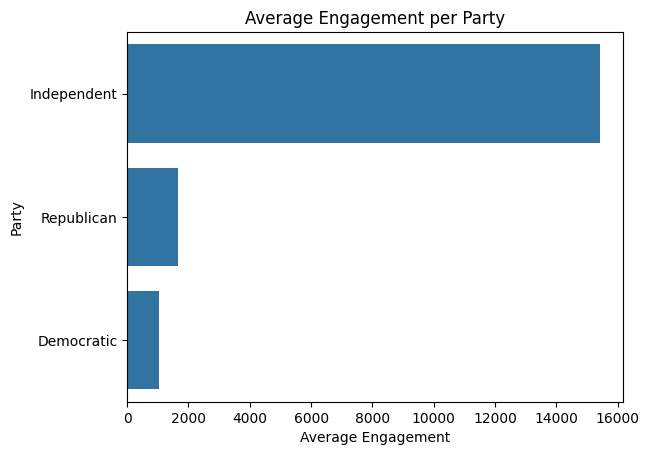

In [49]:
avg_engagement_party = tweets.groupby('Party')['engagement'].mean().sort_values(ascending=False)
print(avg_engagement_party)

sns.barplot(x=avg_engagement_party.values, y=avg_engagement_party.index)
plt.title("Average Engagement per Party")
plt.xlabel("Average Engagement")
plt.show()

Independents appear to have a lot of engagement but we have to keep in mind that there are only 2. 
Republicans seem to have more engagement than democrats eventhough we've just seen that 4 out of the 5 most engaged tweets are from a democrat

#### 11) Do tweets with media have more engagement?

has_media
False    1481.061556
True     1280.569178
Name: engagement, dtype: float64


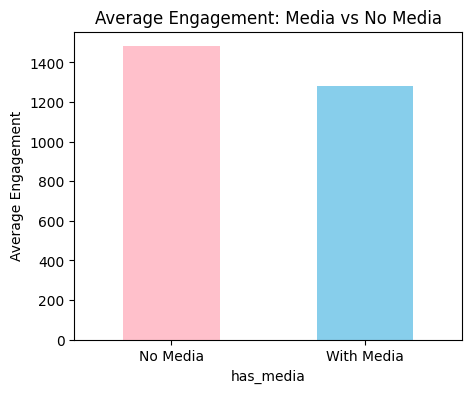

In [50]:
tweets['has_media'] = tweets['media_urls'].notna() & (tweets['media_urls'].str.len() > 2)

mean_engagement = tweets.groupby('has_media')['engagement'].mean()
print(mean_engagement)

plt.figure(figsize=(5,4))
mean_engagement.plot(kind='bar', color=['pink', 'skyblue'])
plt.xticks([0,1], ['No Media', 'With Media'], rotation=0)
plt.ylabel("Average Engagement")
plt.title("Average Engagement: Media vs No Media")
plt.show()

Tweets with no media have more engagement though there doesn't seem to be that much of a difference

#### 12) Tweets per hour per day

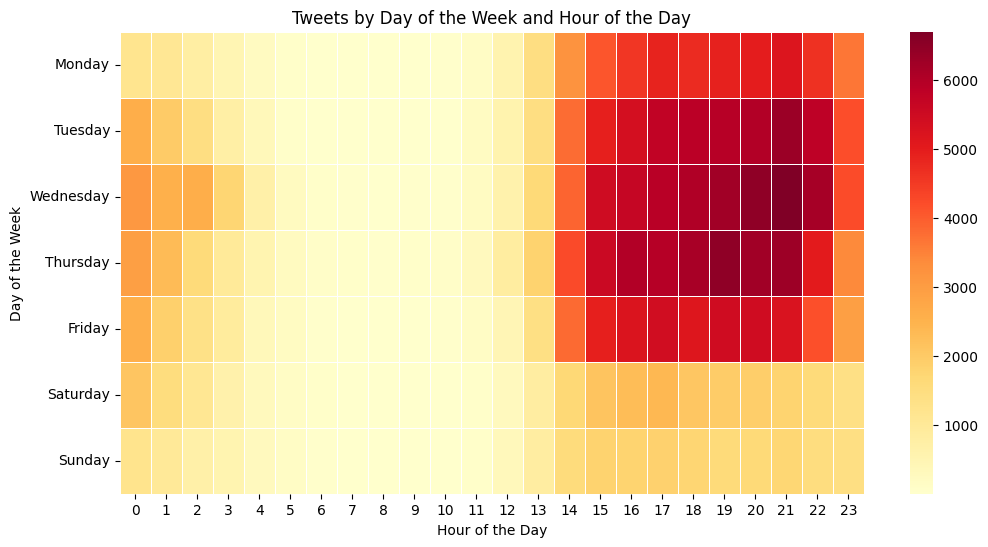

In [62]:
heatmap_data = tweets.groupby(['weekday', 'hour']).size().unstack(fill_value=0)

weekdays_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data.reindex(weekdays_order)

plt.figure(figsize=(12,6))
sns.heatmap(heatmap_data, cmap="YlOrRd", linewidths=.5)

plt.title("Tweets by Day of the Week and Hour of the Day")
plt.xlabel("Hour of the Day")
plt.ylabel("Day of the Week")
plt.show()

Wednesday and thursday are the days with most tweets while the weekend as the lowest amount of tweets. The number of tweets is low in the morning and gradually increases throughout the day, peaking at 21 before declining again

#### 13) What are the most mentioned accounts?

In [53]:
def extract_mentions(text):
    return re.findall(r'@(\w+)', str(text))

all_mentions = tweets['text'].dropna().apply(extract_mentions)
all_mentions = [mention for sublist in all_mentions for mention in sublist]
top_mentions = Counter(all_mentions).most_common(10)
print(top_mentions)

[('POTUS', 8660), ('realDonaldTrump', 3389), ('HouseGOP', 3353), ('HouseDemocrats', 1558), ('DOGE', 1100), ('elonmusk', 1052), ('SpeakerJohnson', 1038), ('SecRubio', 618), ('WaysandMeansGOP', 600), ('FoxNews', 580)]


Donald Trump which is also the current POTUS, is the most mentioned

#### 14) Who replies to whom most often? 

In [54]:
tweets['mentions_in_text'] = tweets['text'].str.contains('@', na=False)
reply_mentions = tweets[tweets['type'] == 'Reply']

count_with_mentions = reply_mentions['mentions_in_text'].sum()
total_replies = len(reply_mentions)

print(f"{count_with_mentions} out of {total_replies} replies contain an '@' mention.")
print(f"Proportion: {count_with_mentions / total_replies:.2%}")

13259 out of 37403 replies contain an '@' mention.
Proportion: 35.45%


We thought every reply tweet would have the '@' of the account they are replying to in the beggining of the tweet but that is not the case. So instead, we'll analyse the mentions done overall

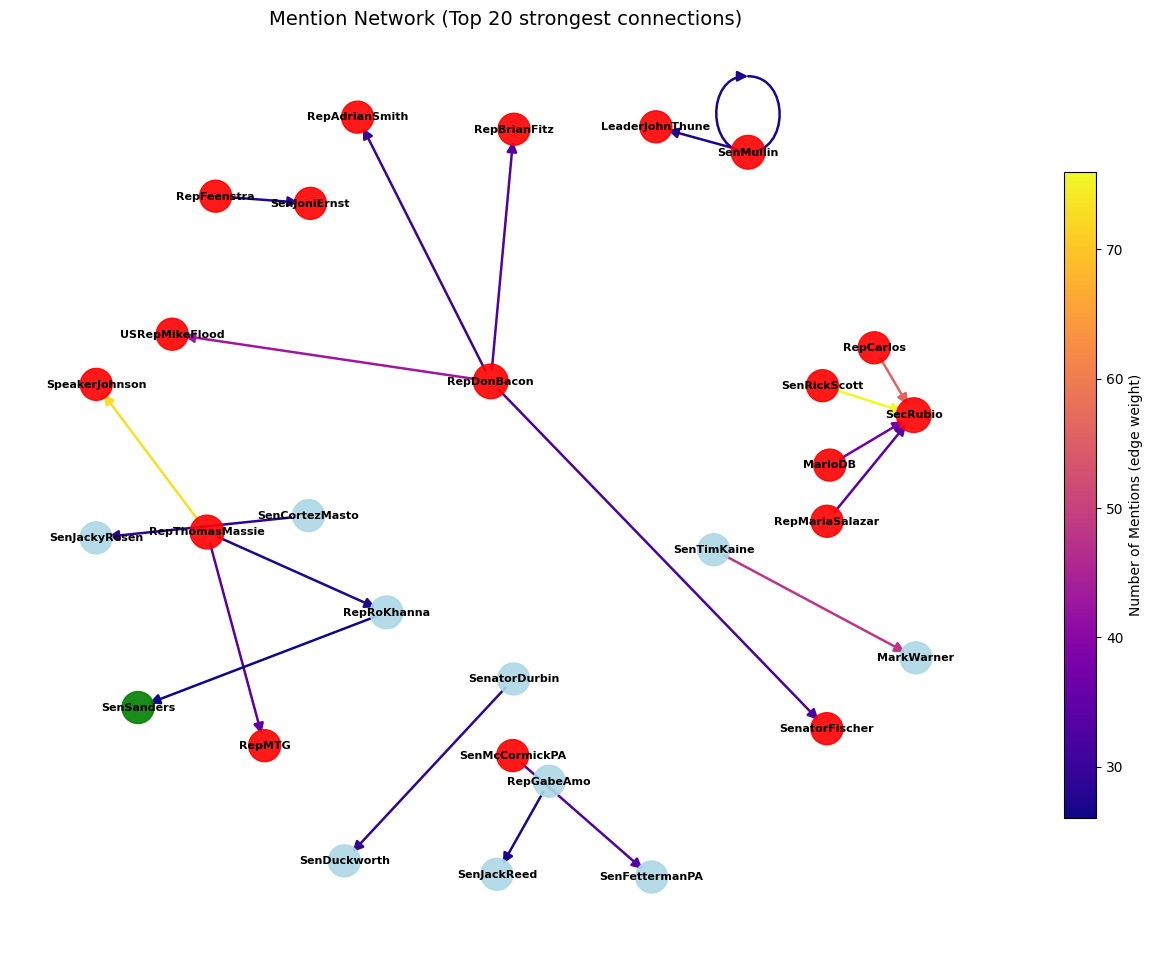

In [55]:
# --- Step 1: Extract mentions ---
def extract_mentions(text):
    return re.findall(r'@(\w+)', str(text))

tweets["mentions"] = tweets["text"].apply(extract_mentions)

# --- Step 2: Build edges (only Congress -> Congress) ---
all_accounts = set(tweets["Account"].unique())
edges = []
for _, row in tweets.iterrows():
    author = row["Account"]
    for mention in row["mentions"]:
        if mention in all_accounts:  
            edges.append((author, mention))

# --- Step 3: Count frequencies ---
edge_counts = Counter(edges)

# --- Step 4: Keep top N strongest connections ---
TOP_N = 20
top_edges = dict(edge_counts.most_common(TOP_N))

# --- Step 5: Create directed graph ---
G = nx.DiGraph()
for (src, tgt), weight in top_edges.items():
    src_party = tweets.loc[tweets["Account"] == src, "Party"].iloc[0]
    tgt_party = tweets.loc[tweets["Account"] == tgt, "Party"].iloc[0]
    G.add_node(src, party=src_party)
    G.add_node(tgt, party=tgt_party)
    G.add_edge(src, tgt, weight=weight)

# --- Step 6: Colors ---
party_colors = {"Democratic": "lightblue", "Republican": "red", "Independent": "green"}
node_colors = [party_colors.get(G.nodes[n]["party"], "grey") for n in G.nodes]

weights = [G[u][v]["weight"] for u, v in G.edges()]
max_w = max(weights) if weights else 1
node_sizes = [500 + 30*G.degree(n) for n in G.nodes]

# Use colormap for edges
cmap = plt.cm.plasma
norm = mpl.colors.Normalize(vmin=min(weights), vmax=max_w)
edge_colors = [cmap(norm(w)) for w in weights]

# --- Step 7: Draw graph ---
fig, ax = plt.subplots(figsize=(16, 12))
pos = nx.spring_layout(G, k=1.5, seed=42)

nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=node_sizes, alpha=0.9, ax=ax)
nx.draw_networkx_labels(G, pos, font_size=8, font_color="black", ax=ax, font_weight="bold")
nx.draw_networkx_edges(G, pos, edge_color=edge_colors, arrows=True, arrowsize=15, width=1.8, ax=ax)

ax.set_title(f"Mention Network (Top {TOP_N} strongest connections)", fontsize=14)
ax.axis("off")

# --- Step 8: Add colorbar legend ---
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, shrink=0.7)
cbar.set_label("Number of Mentions (edge weight)")

plt.show()

We can see that:
1) Republicans dominate the top 20 mentioned accounts and with higher amount of mentions (democratics are always purple)
2) RepDonBacon: appears central, with multiple outgoing edges (hub)
3) SecRubio is mentioned a lot (authority)  
4) Cross-party edges (Republicans mentioning Democrats) exist but are weaker

#### 15) How many Senators and Representatives are there?

In [56]:
role_counts = members['Role'].value_counts()
print("Distribution of roles:\n", role_counts, "\n")

Distribution of roles:
 Role
Representative    440
Senator           102
Delegate            3
Name: count, dtype: int64 



#### 16) Are Senators more active than Representatives?

Total tweets per role:
 Role
Delegate             688
Representative    272212
Senator            84996
Name: tweet_id, dtype: int64 

Average tweets per account by role:
 Role
Senator           833.294118
Representative    621.488584
Delegate          229.333333
dtype: float64 



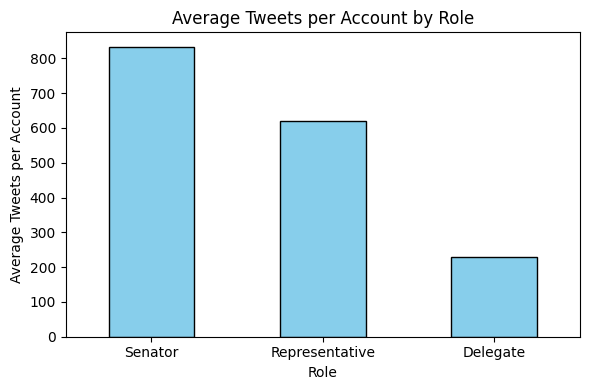

In [57]:
role_counts = tweets['Role'].value_counts()
tweets_per_role = tweets.groupby('Role')['tweet_id'].count()
accounts_per_role = tweets.groupby('Role')['Account'].nunique()

avg_tweets_per_account = (tweets_per_role / accounts_per_role).sort_values(ascending=False)

print("Total tweets per role:\n", tweets_per_role, "\n")
print("Average tweets per account by role:\n", avg_tweets_per_account, "\n")

plt.figure(figsize=(6,4))
avg_tweets_per_account.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title("Average Tweets per Account by Role")
plt.xlabel("Role")
plt.ylabel("Average Tweets per Account")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Senators are more active

#### 17) Do Senators get more engagement than Representatives?

Average engagement per tweet by role:
 Role
Senator           2282.995470
Representative    1110.158200
Delegate           286.572674
Name: engagement, dtype: float64 



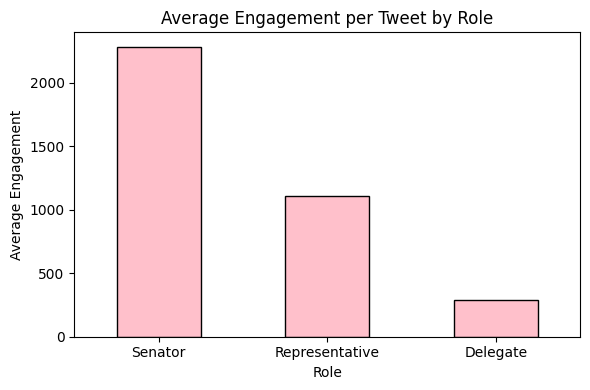

In [58]:
engagement_by_role = tweets.groupby('Role')['engagement'].mean().sort_values(ascending=False)
print("Average engagement per tweet by role:\n", engagement_by_role, "\n")

plt.figure(figsize=(6,4))
engagement_by_role.plot(kind='bar', color='pink', edgecolor='black')

plt.title("Average Engagement per Tweet by Role")
plt.xlabel("Role")
plt.ylabel("Average Engagement")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Senators get more engagement

#### 18) How many senators are democratic and republican? And for representatives?

In [59]:
role_party_counts = tweets.groupby(['Role', 'Party'])['Account'].nunique().unstack().fillna(0)

print("Number of unique accounts by Role and Party:\n", role_party_counts, "\n")

Number of unique accounts by Role and Party:
 Party           Democratic  Independent  Republican
Role                                               
Delegate               2.0          0.0         1.0
Representative       218.0          0.0       220.0
Senator               45.0          2.0        55.0 



More or less the same for representatives but there are more senators republicans than democratics

#### 19) How is the cumulative growth of tweets over time

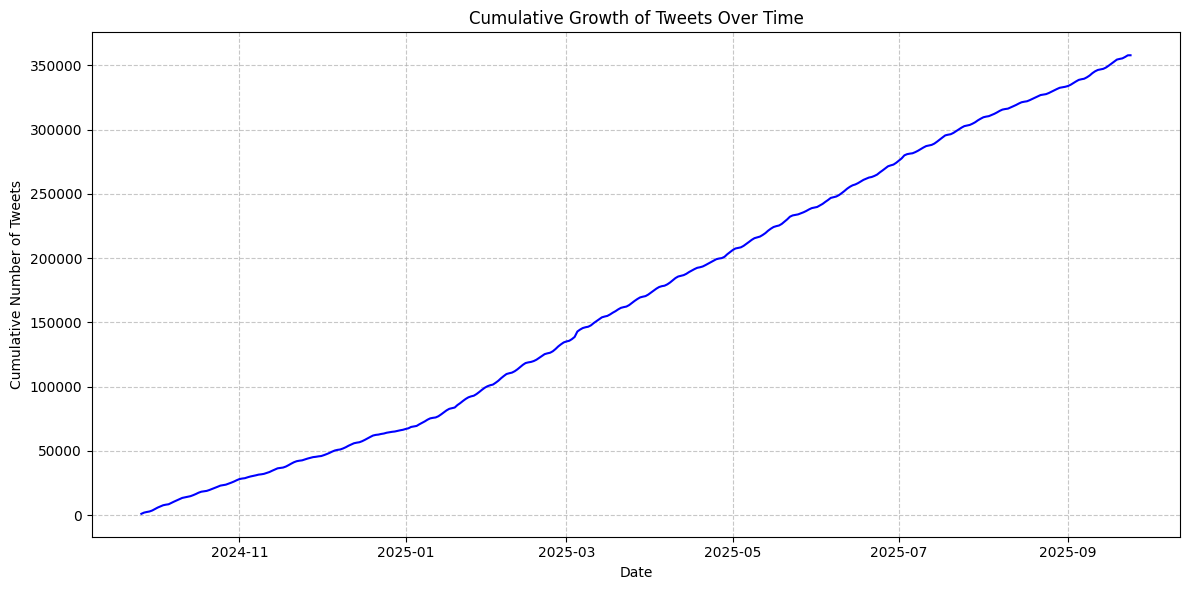

In [ ]:
tweets_per_day = tweets.groupby('date').size().reset_index(name='count')

tweets_per_day['cumulative'] = tweets_per_day['count'].cumsum()

# Plot
plt.figure(figsize=(12,6))
plt.plot(tweets_per_day['date'], tweets_per_day['cumulative'], color='blue')

plt.title("Cumulative Growth of Tweets Over Time")
plt.xlabel("Date")
plt.ylabel("Cumulative Number of Tweets")
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

It's more or less linear

#### 20) How is the cumulative growth of tweets over time per party per role

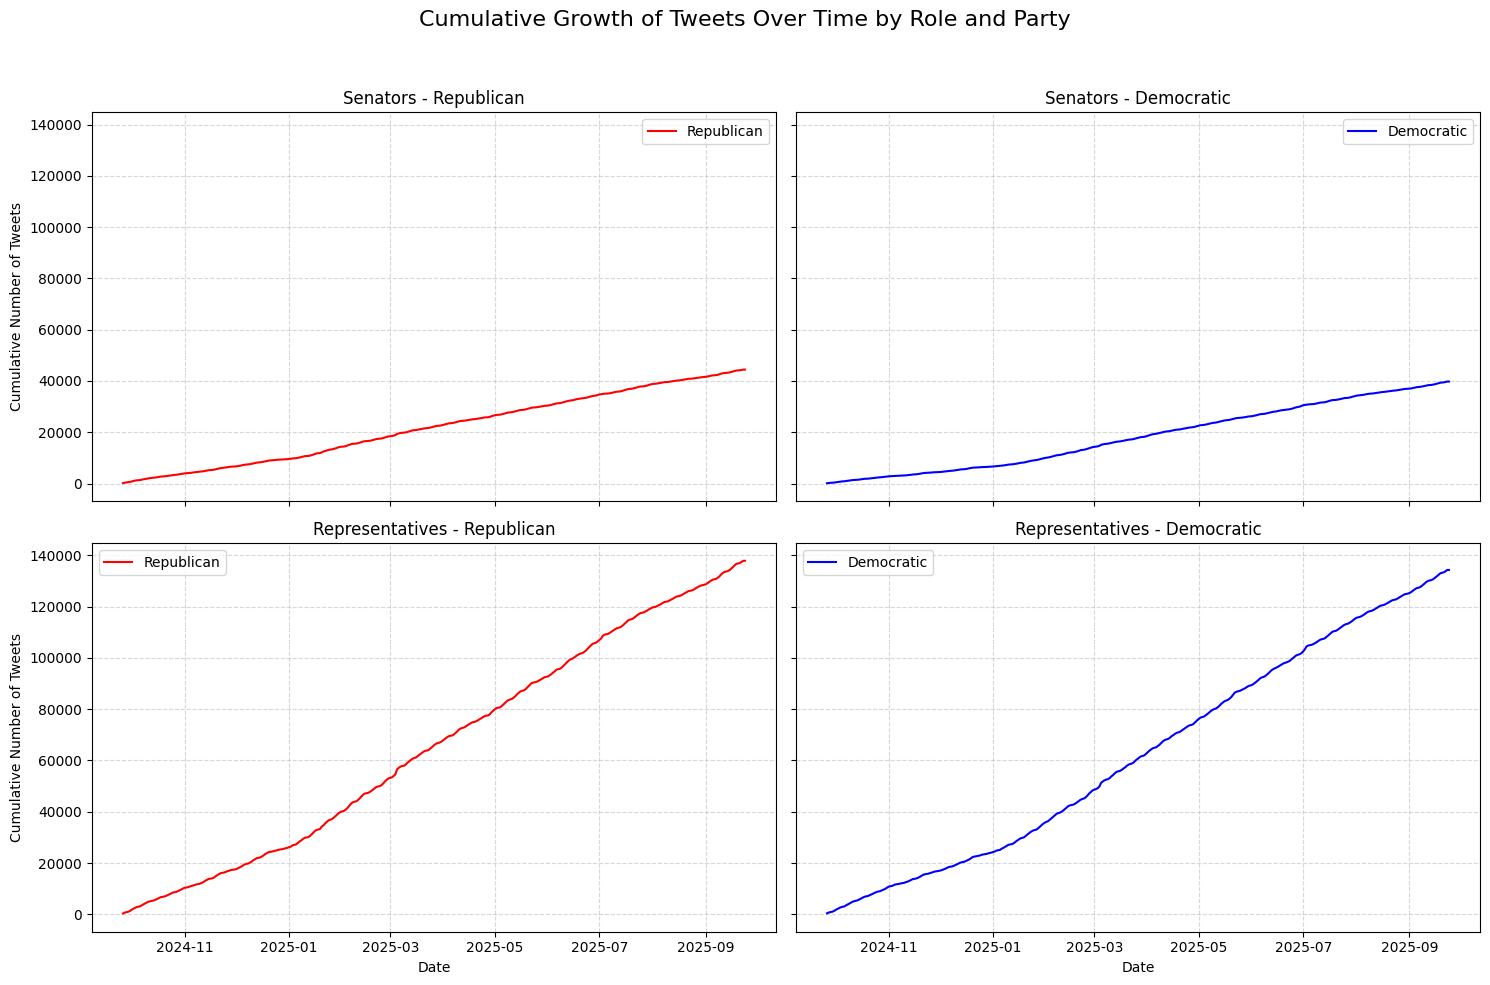

In [69]:
roles = ['Senator', 'Representative']
parties = ['Republican', 'Democratic']
colors = {'Republican': 'red', 'Democratic': 'blue'}

# Create 2x2 subplot
fig, axes = plt.subplots(2, 2, figsize=(15,10), sharex=True, sharey=True)

for i, role in enumerate(roles):
    for j, party in enumerate(parties):
        # Filter tweets for current role and party
        subset = tweets[(tweets['Role'] == role) & (tweets['Party'] == party)].copy()
        
        # Make sure 'date' column exists as date only
        subset['date'] = subset['created_at'].dt.date
        
        # Count tweets per day and cumulative sum
        daily_counts = subset.groupby('date').size().reset_index(name='count')
        daily_counts['cumulative'] = daily_counts['count'].cumsum()
        
        # Plot
        axes[i, j].plot(daily_counts['date'], daily_counts['cumulative'], color=colors[party], label=party)
        axes[i, j].set_title(f"{role}s - {party}")
        axes[i, j].grid(True, linestyle='--', alpha=0.5)
        axes[i, j].legend()

# Labels
fig.suptitle("Cumulative Growth of Tweets Over Time by Role and Party", fontsize=16)
for ax in axes[1, :]:
    ax.set_xlabel("Date")
for ax in axes[:, 0]:
    ax.set_ylabel("Cumulative Number of Tweets")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

More or less linear too 